In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "2932636388-XF6XFA8UG5xSyIs1KllTwlnhD6KL9sSB9huCXar"
access_token_secret = "6uBdK4xlaoPAsrD70SqYAwqI7L7jwuUaiRTrGgTPlY0Ze"
consumer_key = "4jVK9qOh8olv9jb1BKxzJob6D"
consumer_secret = "i1B4uRN5cnNrNGYj8417uTK6d3lnzhJD4rbjYcArtHdlkAszVD"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        #print data
        with open('fetched_tweets.txt','a') as tf:
            tf.write(data)
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['python', 'javascript', 'ruby'])

In [74]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
tweets_data = []
tweets_file = open('fetched_tweets.txt', "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [10]:
print len(tweets_data)

1169


In [11]:
tweets = pd.DataFrame()

In [12]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [54]:
tweets.head()

,text,lang,country
0,Saudi Arabia S7 Rumor Roundup: 10 Leaked Featu...,en,None
1,♮§ Santa Deal 1/2 Pink and ruby Red Glass Seed...,en,None
2,RT @KingEgi: Experimenting with #ZeroMQ + #Gev...,en,None
3,@notsam @OpieRadio \nIs that Roland in the bac...,en,None
4,Taking a JavaScript class this semester &amp; ...,en,None


In [106]:
tweets_by_lang = tweets['lang'].value_counts()
tweets_by_lang

en     959
es      39
fr      29
pt      21
ja      20
de      17
und     17
ht      11
ro      10
et       9
in       8
it       7
nl       6
cs       3
sv       2
ru       2
fi       2
tl       2
da       1
pl       1
fa       1
ar       1
cy       1
Name: lang, dtype: int64

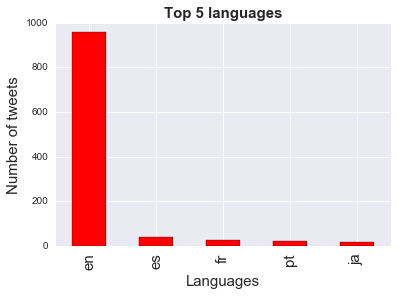

In [107]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [110]:
tweets_by_country = tweets['country'].value_counts()
tweets_by_country

United States     10
United Kingdom     4
Paraguay           1
Malaysia           1
Portugal           1
Brasil             1
France             1
España             1
Name: country, dtype: int64

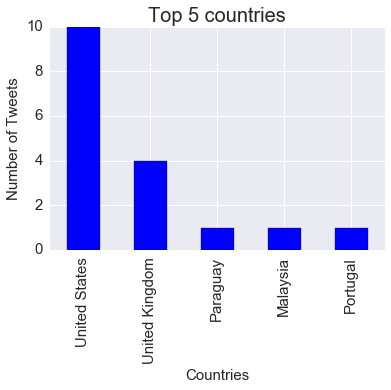

In [115]:
fig,ax = plt.subplots()
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel('Countries',fontsize=15)
ax.set_ylabel('Number of Tweets',fontsize=15)
ax.set_title('Top 5 countries',fontsize=20)
tweets_by_countries[:5].plot(ax=ax,kind='bar',color='blue')

In [118]:
import re

def word_in_text(word,text):
    word = word.lower()
    text = text.lower()
    match = re.search(word,text)
    if(match):
        return True
    else:
        return False
        

In [119]:
tweets['python'] = tweets['text'].apply(lambda tweet : word_in_text('python',tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet : word_in_text('javascript',tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet : word_in_text('ruby',tweet))

In [122]:
tweets.head()

,text,lang,country,python,javascript,ruby
0,Saudi Arabia S7 Rumor Roundup: 10 Leaked Featu...,en,None,False,True,False
1,♮§ Santa Deal 1/2 Pink and ruby Red Glass Seed...,en,None,False,False,True
2,RT @KingEgi: Experimenting with #ZeroMQ + #Gev...,en,None,True,False,False
3,@notsam @OpieRadio \nIs that Roland in the bac...,en,None,False,False,True
4,Taking a JavaScript class this semester &amp; ...,en,None,False,True,False


In [121]:
print tweets['python'].value_counts()[True]
print tweets['javascript'].value_counts()[True]
print tweets['ruby'].value_counts()[True]

323
296
485


In [129]:
prg_lang = ['python','javascript','ruby']
prg_lang_count_dict = {'pyhton':tweets['python'].value_counts()[True],'javascript':tweets['javascript'].value_counts()[True],
                      'ruby':tweets['ruby'].value_counts()[True]};

In [134]:
prg_lang_count = Series(prg_lang_count_dict)

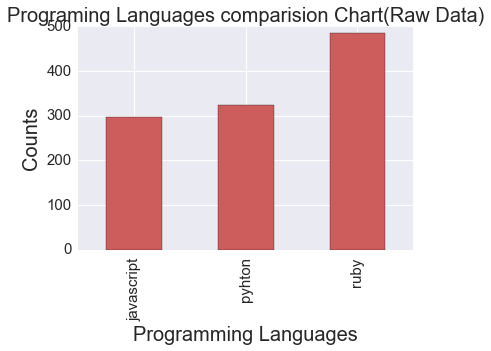

In [143]:
fig,ax = plt.subplots()
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel('Programming Languages',fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Programing Languages comparision Chart(Raw Data)',fontsize=20)
prg_lang_count.plot(ax = ax,kind='bar',color='indianred')

In [145]:
tweets['programming'] = tweets['text'].apply(lambda tweet:word_in_text('programming',tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet:word_in_text('tutorial',tweet))

In [147]:
tweets['relevant'] = tweets['text'].apply(lambda tweet:word_in_text('programming',tweet) or 
                                          word_in_text('tutorial',tweet))

In [151]:
tweets.head()

,text,lang,country,python,javascript,ruby,programming,tutorial,relevant
0,Saudi Arabia S7 Rumor Roundup: 10 Leaked Featu...,en,None,False,True,False,False,False,False
1,♮§ Santa Deal 1/2 Pink and ruby Red Glass Seed...,en,None,False,False,True,False,False,False
2,RT @KingEgi: Experimenting with #ZeroMQ + #Gev...,en,None,True,False,False,False,False,False
3,@notsam @OpieRadio \nIs that Roland in the bac...,en,None,False,False,True,False,False,False
4,Taking a JavaScript class this semester &amp; ...,en,None,False,True,False,False,False,False


In [150]:
print tweets['programming'].value_counts()[True]
print tweets['tutorial'].value_counts()[True]
print tweets['relevant'].value_counts()[True]


25
7
31


In [152]:
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]

In [156]:
tweets_by_lang = Series(tweets_by_prg_lang,index=prg_lang)

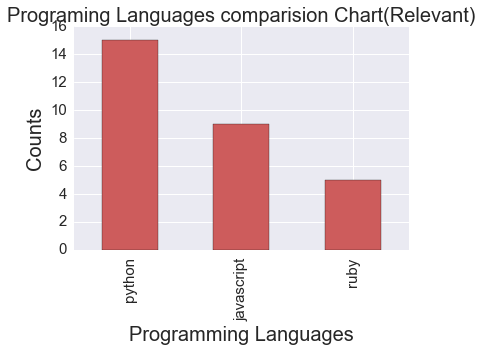

In [158]:
fig,ax = plt.subplots()
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.set_xlabel('Programming Languages',fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Programing Languages comparision Chart(Relevant)',fontsize=20)
tweets_by_lang.plot(ax = ax,kind='bar',color='indianred')